# Business Problem

- Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
- The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

## Solution :-

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
# Reading a file

df = pd.read_csv('Task - 1 Titanic-Dataset.csv')

Problem Statement:                      
Objective: Build a machine learning model to predict whether a passenger survived or not.

Target Variable(survived):                                                

0: Not survived,
1: Survived.

Dataset:

A dataset containing various features related to passengers (e.g., age, gender, pclass,Sex,Fare,Embarked,etc..).

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# dimensions of dataset           

df.shape

# this dataset contains 891 rows and 12 columns

(891, 12)

In [7]:
# datatypes of columns

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [9]:
# 5 point summary for numerical columns

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# summary count for categorical columns

df_cat.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
# there is need to drop categorical column name like ['Name','Ticket','Cabin']

# Reason :- these 3 columns contains more than 70% values are unique so these type of columns 
#           generate a problems to build a machine learning model, ML model is unable to 
#           create a patterns because it contains so much unique values in the data...

In [12]:
# drop that 3 unnecessary column

df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [13]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df_cat[i].value_counts())
        print('------------------------')

Sex
male      577
female    314
Name: count, dtype: int64
------------------------
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
------------------------


In [14]:
df['PassengerId'].value_counts()  # it contains all unique values we have to drop this column also

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

In [15]:
# drop passengerid column

df.drop('PassengerId',axis=1,inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

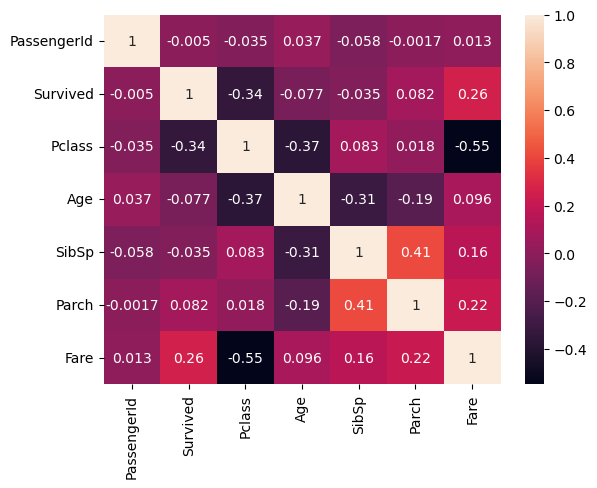

In [17]:
sns.heatmap(df_num.corr(),annot=True)

## Null Values

In [18]:
# Null values

df.isnull().sum()/df.shape[0]*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [19]:
# we have to impute null values, but before that we need to check it contains outliers or not

## Outliers

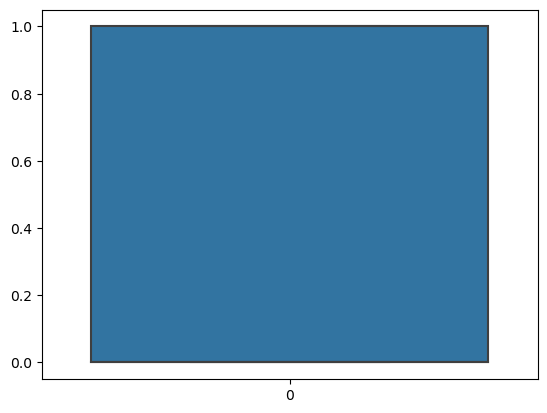

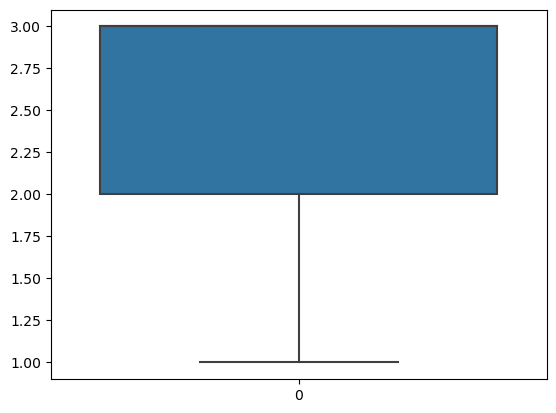

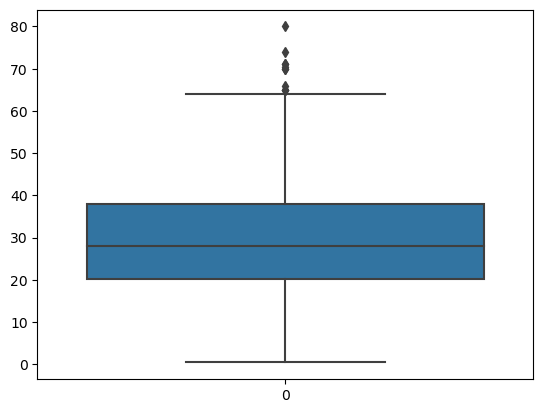

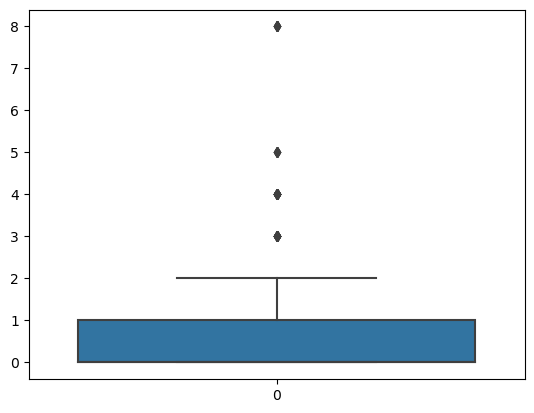

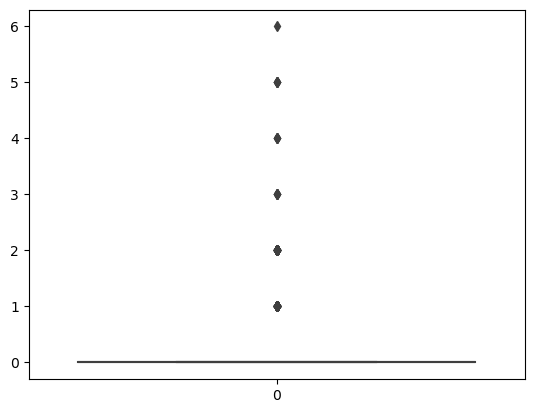

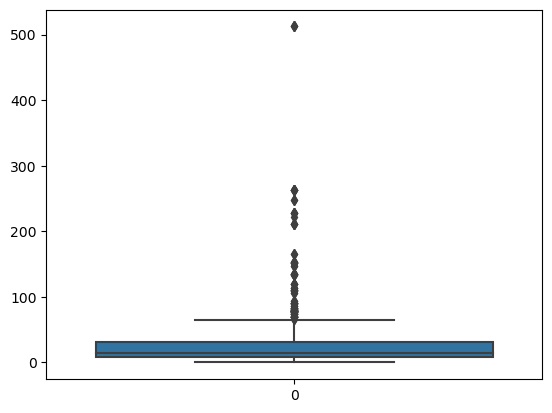

In [20]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(df[i])
        plt.show()

In [21]:
# Age column contains outliers so we impute the null values of age column by median
# embarked is categorical column so we impute the null values of embarked column by mode

## Imputing Null values

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [23]:
mode = df['Embarked'].mode()

mode

0    S
Name: Embarked, dtype: object

In [24]:
df['Embarked'] = df['Embarked'].fillna('S')

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## visualization

C:\Users\vb905\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


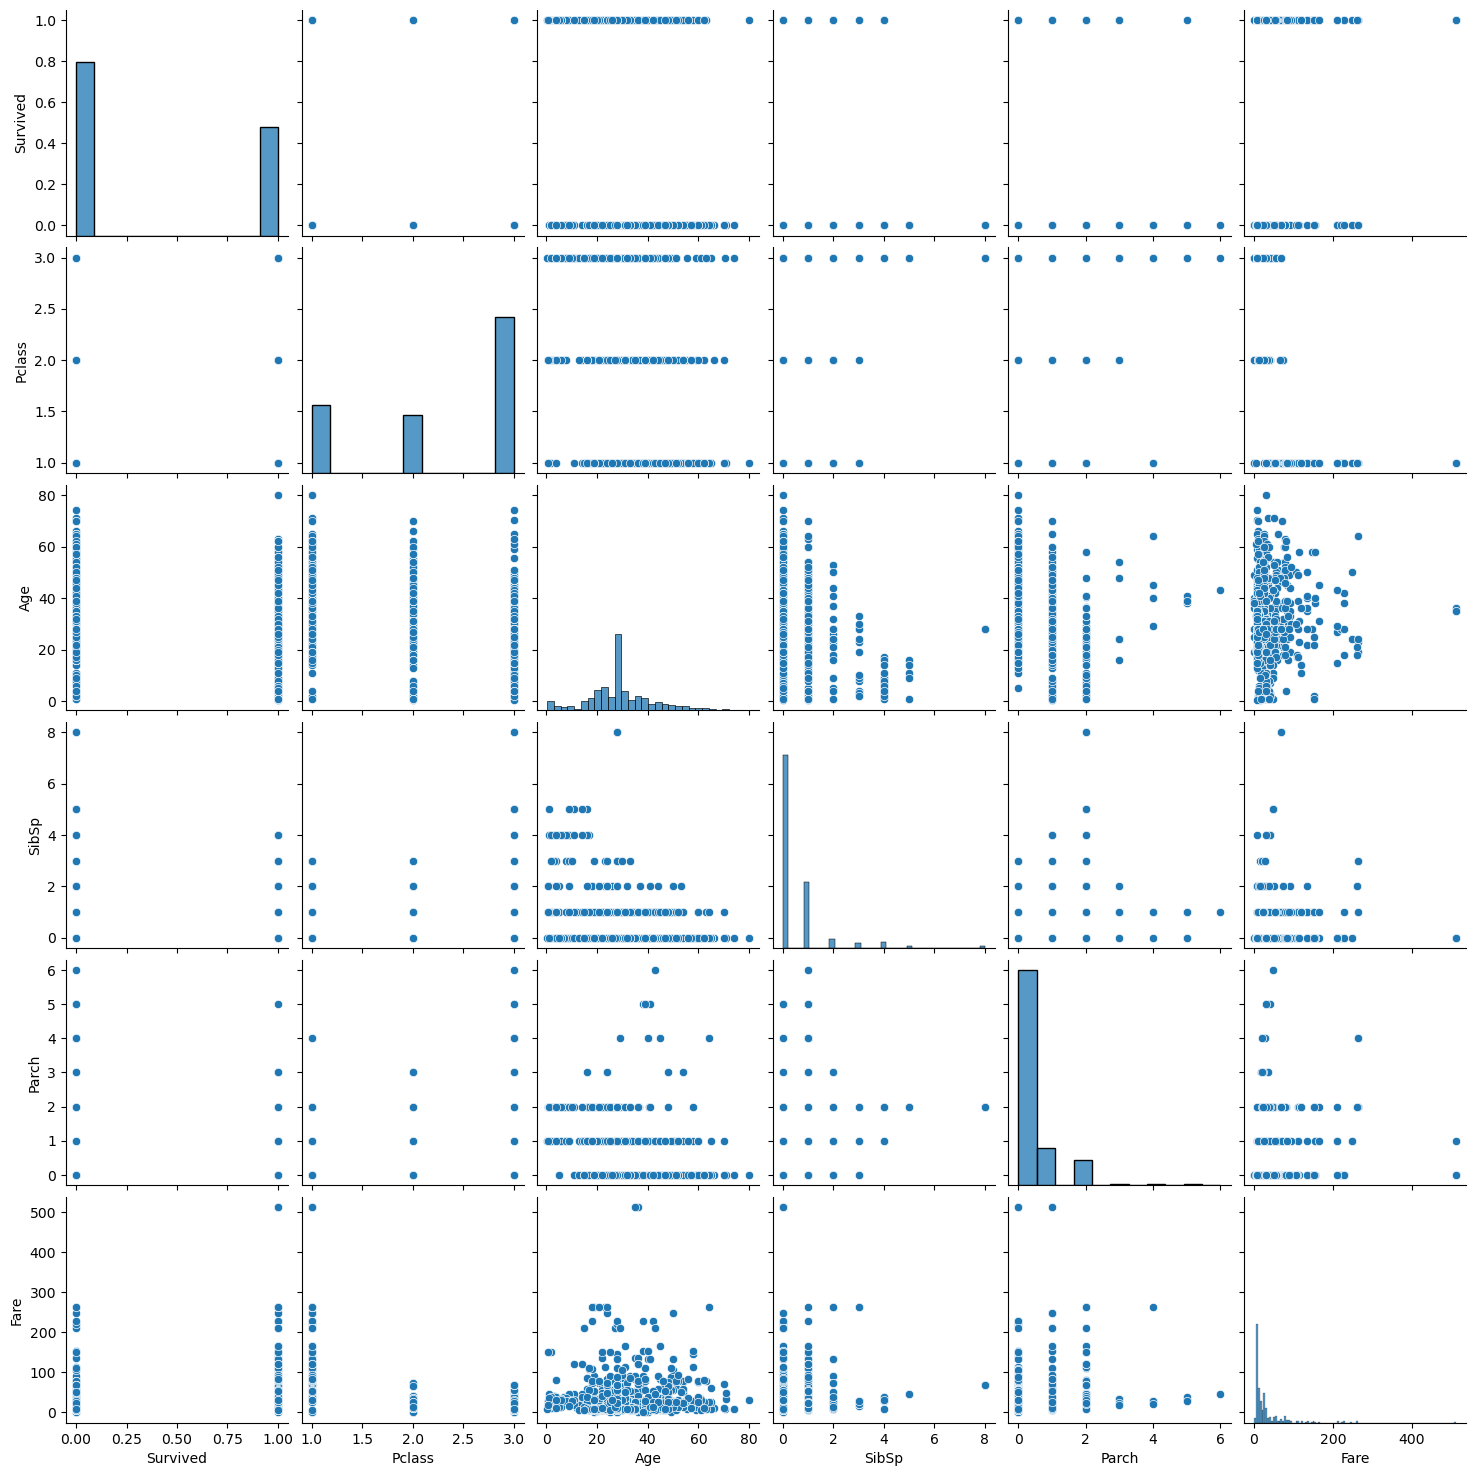

In [26]:
sns.pairplot(data=df)

In [27]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

<Axes: xlabel='Survived'>

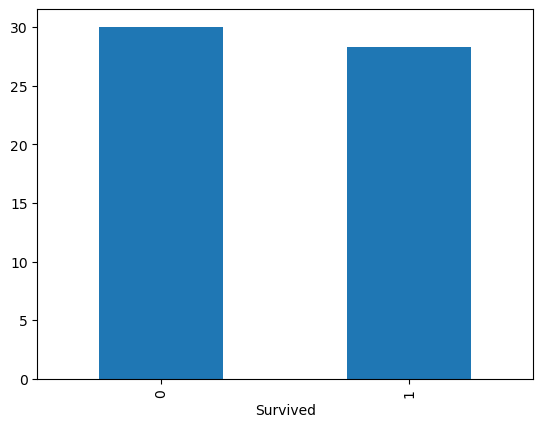

In [28]:
df.groupby('Survived')['Age'].mean().plot(kind='bar')

<Axes: xlabel='Embarked'>

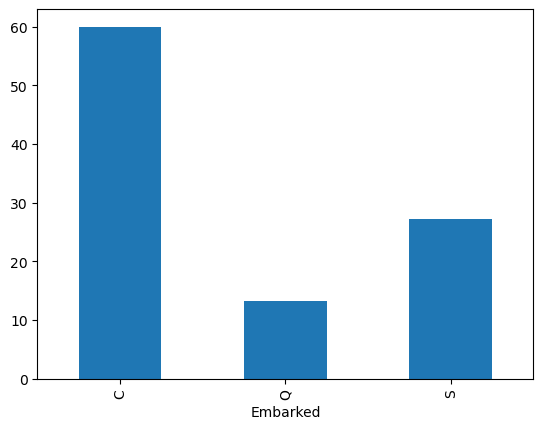

In [29]:
df.groupby('Embarked')['Fare'].mean().plot(kind='bar')

In [30]:
# inference:-

# peoples are survived and not survived their age are near about same.
# people are coming from c Embarked are paid more fare fess than Q and S

## Outlier Treatment 

In [31]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [32]:
df_num = df.select_dtypes(exclude='object')

In [33]:
q1 = df_num.quantile(0.25)

q3 = df_num.quantile(0.75)

iqr = q3 - q1 

ll = q1 - (1.5*iqr)

ul = q3 + (1.5*iqr)

df = df[~((df_num < ll)|(df_num > ul)).any(axis=1)]

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q


In [35]:
# we need to scale the data for numerical features

## Scaling

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [38]:
import warnings 

warnings.filterwarnings('ignore')

In [39]:
df_scale = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [40]:
for i in df_scale.columns:
        df[i] = std.fit_transform(df[[i]])
        

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.67833,male,-0.854761,1.800735,0.0,-0.609448,S
2,1,0.67833,female,-0.386610,-0.448235,0.0,-0.555858,S
3,1,-2.04917,female,0.666730,1.800735,0.0,3.030715,S
4,0,0.67833,male,0.666730,-0.448235,0.0,-0.545934,S
5,0,0.67833,male,-0.152535,-0.448235,0.0,-0.513517,Q


## Encoding

In [42]:
# we need to encode the categorical variable 

# Reason :- ML model does not take categorical values for prediction so we need to convert into numerical form

In [43]:
df = pd.get_dummies(data=df,columns=['Sex','Embarked'],dtype='int')

In [44]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.67833,-0.854761,1.800735,0.0,-0.609448,0,1,0,0,1
2,1,0.67833,-0.386610,-0.448235,0.0,-0.555858,1,0,0,0,1
3,1,-2.04917,0.666730,1.800735,0.0,3.030715,1,0,0,0,1
4,0,0.67833,0.666730,-0.448235,0.0,-0.545934,0,1,0,0,1
5,0,0.67833,-0.152535,-0.448235,0.0,-0.513517,0,1,0,1,0


## distribution of T.V.

In [45]:
# no need of smote analysis here

df['Survived'].value_counts()/df.shape[0]*100

Survived
0    70.017331
1    29.982669
Name: count, dtype: float64

## train_test_split

In [46]:
from sklearn.model_selection import train_test_split

# split the data 

x = df.drop('Survived',axis=1)   # independent variables
y = df['Survived']               # dependent variable (Target)

# we split the data into 70:30 portion...

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=10)

## Model Building

In [47]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR_model = LR.fit(xtrain,ytrain)
train_pred_1 = LR_model.predict(xtrain)
test_pred_1 = LR_model.predict(xtest)
         
from sklearn.metrics import classification_report

print(classification_report(ytrain,train_pred_1))
print(classification_report(ytest,test_pred_1))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       281
           1       0.70      0.66      0.68       122

    accuracy                           0.81       403
   macro avg       0.77      0.77      0.77       403
weighted avg       0.81      0.81      0.81       403

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       123
           1       0.66      0.53      0.59        51

    accuracy                           0.78       174
   macro avg       0.74      0.71      0.72       174
weighted avg       0.77      0.78      0.77       174



In [48]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT_model = DT.fit(xtrain,ytrain)
train_pred_2 = DT_model.predict(xtrain)
test_pred_2 = DT_model.predict(xtest)

print(classification_report(ytrain,train_pred_2))
print(classification_report(ytest,test_pred_2))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       281
           1       0.99      0.92      0.95       122

    accuracy                           0.97       403
   macro avg       0.98      0.96      0.97       403
weighted avg       0.97      0.97      0.97       403

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       123
           1       0.56      0.63      0.59        51

    accuracy                           0.75       174
   macro avg       0.70      0.71      0.70       174
weighted avg       0.76      0.75      0.75       174



In [49]:
from sklearn.ensemble import RandomForestClassifier

RD = RandomForestClassifier()
RD_model = RD.fit(xtrain,ytrain)
train_pred_3 = RD_model.predict(xtrain)
test_pred_3 = RD_model.predict(xtest)

print(classification_report(ytrain,train_pred_3))
print(classification_report(ytest,test_pred_3))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       281
           1       0.97      0.94      0.95       122

    accuracy                           0.97       403
   macro avg       0.97      0.96      0.97       403
weighted avg       0.97      0.97      0.97       403

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       123
           1       0.66      0.65      0.65        51

    accuracy                           0.80       174
   macro avg       0.76      0.75      0.76       174
weighted avg       0.80      0.80      0.80       174



## GSCV

In [50]:
# hyperparameter_tuning 

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[50,70,120,150,200],
             'min_samples_split':[3,4,5,6,7],
             'min_samples_leaf':[2,3,4,5,6,7]}

from sklearn.metrics import roc_auc_score

GSCV = GridSearchCV(estimator=RD,param_grid=param_grid,scoring=roc_auc_score,n_jobs=-1)
GSCV_model = GSCV.fit(xtrain,ytrain)

print("best_parametrs:", GSCV_model.best_params_)

best_parametrs: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


In [51]:
# tuned_model (Random_forest_classifier)

from sklearn.ensemble import RandomForestClassifier

RD = RandomForestClassifier(min_samples_leaf = 2, min_samples_split= 3, n_estimators = 50)
RD_model = RD.fit(xtrain,ytrain)
train_pred_4 = RD_model.predict(xtrain)
test_pred_4 = RD_model.predict(xtest)

print(classification_report(ytrain,train_pred_4))
print(classification_report(ytest,test_pred_4))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       281
           1       0.91      0.72      0.80       122

    accuracy                           0.89       403
   macro avg       0.90      0.84      0.87       403
weighted avg       0.89      0.89      0.89       403

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       123
           1       0.71      0.59      0.65        51

    accuracy                           0.81       174
   macro avg       0.78      0.75      0.76       174
weighted avg       0.80      0.81      0.80       174



## Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,test_pred_4)
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]

<Axes: >

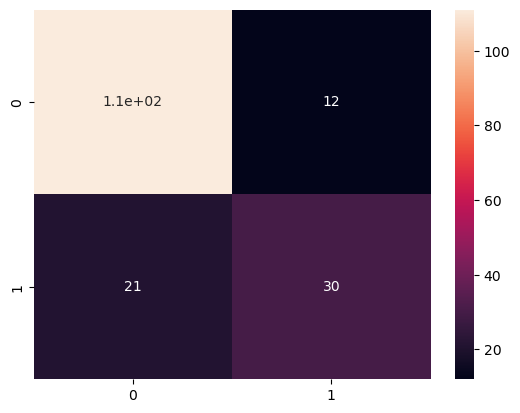

In [53]:
sns.heatmap(cm,annot=True)

In [54]:
test_pred_proba = RD.predict_proba(xtest)

test_pred_proba

array([[0.95365281, 0.04634719],
       [0.86619517, 0.13380483],
       [0.23881101, 0.76118899],
       [0.96018041, 0.03981959],
       [0.99879638, 0.00120362],
       [0.84239557, 0.15760443],
       [0.93812121, 0.06187879],
       [0.97853299, 0.02146701],
       [0.78894194, 0.21105806],
       [0.97608466, 0.02391534],
       [0.91870851, 0.08129149],
       [0.68839102, 0.31160898],
       [0.99112169, 0.00887831],
       [0.30639203, 0.69360797],
       [0.48547018, 0.51452982],
       [0.35686506, 0.64313494],
       [0.23881101, 0.76118899],
       [0.4647625 , 0.5352375 ],
       [0.99112169, 0.00887831],
       [0.08237509, 0.91762491],
       [0.65996825, 0.34003175],
       [0.93955625, 0.06044375],
       [0.1122939 , 0.8877061 ],
       [0.97195212, 0.02804788],
       [0.07743623, 0.92256377],
       [0.32388653, 0.67611347],
       [0.96167877, 0.03832123],
       [0.75111524, 0.24888476],
       [0.00545455, 0.99454545],
       [0.96423032, 0.03576968],
       [0.

## ROC-AUC-CURVE

In [55]:
from sklearn.metrics import roc_curve

In [56]:
fpr,tpr,thrs = roc_curve(ytest,test_pred_proba[:,1])

In [57]:
df2 = pd.DataFrame({'FPR':fpr,'TPR':tpr,'THRESHOLD':thrs})
df2

,FPR,TPR,THRESHOLD
0,0.000000,0.000000,1.994545
1,0.000000,0.019608,0.994545
2,0.000000,0.117647,0.917625
3,0.008130,0.117647,0.899230
4,0.008130,0.215686,0.835790
...,...,...,...
62,0.886179,1.000000,0.022196
63,0.910569,1.000000,0.021467
64,0.934959,1.000000,0.015249
65,0.991870,1.000000,0.008878


Text(0.5, 1.0, 'ROC-AUC-CURVE')

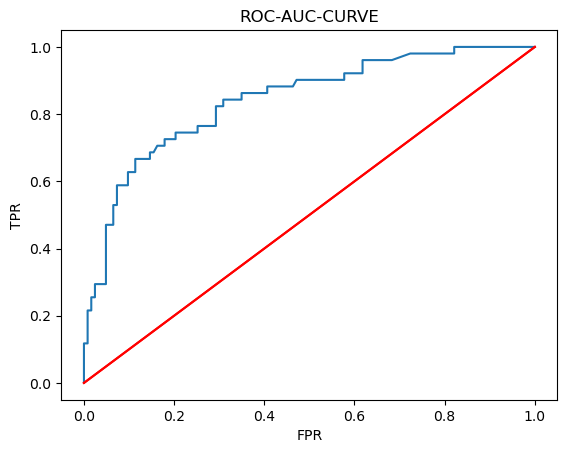

In [58]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC-CURVE')

## interpretation

- Logistic Regression: Trains and evaluates a logistic regression model.
- Decision Tree Classifier: Trains and evaluates a decision tree model.
- Random Forest Classifier: Trains and evaluates a random forest model.
- GridSearchCV: Performs hyperparameter tuning for the random forest model.
- Tuned Random Forest Classifier: Trains and evaluates the random forest model with the best parameters found by GridSearchCV.
- Confusion Matrix: Plots the confusion matrix for the tuned random forest model.